In [2]:
from collections import Counter
from flask import Flask, request, render_template, jsonify
import pickle
import pandas as pd
import numpy as np
import requests
import re
from bs4 import BeautifulSoup
import argparse
import time
from splinter import Browser
import time
from collections import defaultdict
import json
import re

In [12]:
f = open('.env','r')
env = {}
for line in f.readlines():
    env[line.strip().split("=")[0]]=line.strip().split("=")[1]

In [255]:
br = Browser("firefox")
br.visit("https://www.fantasycruncher.com/login?referer=/")
br.find_by_id('user_email').fill(env['fc_login'])
br.find_by_id('user_password').fill(env['fc_pw'])
br.find_by_id('submit').click()

In [256]:
rewind_base = "https://www.fantasycruncher.com/lineup-rewind/draftkings/NBA/"
date = "2018-10-29"
br.visit(rewind_base+date)

In [257]:
all_players = "/html/body/div[3]/div[1]/div[1]/div/div[2]/div[8]/div[2]/div[2]/div[2]/div[2]/div/label/select/option[7]"
br.find_by_name("ff_length").click()
br.find_by_xpath(all_players).click()

In [243]:
nav_links_xpath = "/html/body/div[2]/header/ul/li"
nav = br.find_by_xpath(nav_links_xpath)

In [40]:
sport = "NBA"
for ind, elem in enumerate(nav):
    print(elem.find_by_css('.top-nav-link').value)
    if (elem.find_by_css('.top-nav-link').value == sport):
        print("click")
        br.find_by_xpath(nav_links_xpath+"[{}]".format(ind+1)).click()


NFL
NBA
click
MLB
NHL
CFB
GOLF
MMA
CFL
NAS
WNBA
SOCbeta



In [93]:
tr_selector = "/html/body/div[3]/div[1]/div[1]/div/div[2]/div[8]/div[1]/div[2]/table/tbody/tr"
table = br.find_by_xpath(tr_selector)

In [163]:
asdf = table[2]
len(table)

40

In [104]:
asdf.find_by_css(".player-stats").text

'Karl-Anthony Towns'

In [105]:
asdf.find_by_css(".salaryCol").text

'8000'

In [171]:
for date in dates[0:2]:
    print(rewind_base+date)

https://www.fantasycruncher.com/lineup-rewind/draftkings/NBA/2017-10-17
https://www.fantasycruncher.com/lineup-rewind/draftkings/NBA/2017-10-18


In [219]:
dates = data[data['date']>'2017-09-01']['date'].unique()
salary_data = pd.DataFrame()
for date in dates:
    time.sleep(1)
    br.visit(rewind_base+date)
    table = br.find_by_xpath(tr_selector)
    try:
        if len(table) > 0:
            temp_dict = {}
            temp_dict['player'] = []
            temp_dict['pos'] = []
            temp_dict['team']=[]
            temp_dict['opp']=[]
            temp_dict['salary'] = []
            temp_dict['start'] = []
            temp_dict['mins'] = []
            temp_dict['score'] = []
            for ind, row in enumerate(table):
                temp_dict['player'].append(row.find_by_css(".player-stats").text)
                temp_dict['salary'].append(row.find_by_css(".salaryCol").text)
                try:
                    temp_dict['pos'].append(row.find_by_css("td select.pos-select option")[0].text)
                except:
                    temp_dict['pos'].append(row.find_by_css("td")[1].text)
                temp_dict['team'].append(row.find_by_css("td")[2].text)
                temp_dict['opp'].append(row.find_by_css("td")[3].text)
                temp_dict['start'].append(row.find_by_css("td")[-4].text)
                temp_dict['mins'].append(row.find_by_css("td")[-3].text)
                temp_dict['score'].append(row.find_by_css("td")[-2].text)                              
            temp_df = pd.DataFrame(temp_dict)
            temp_df['date']=date
            salary_data = salary_data.append(temp_df)
        else:
            print("empty {}".format(date))
    except:
        print("error {}".format(date))
print("Done!")


error 2017-10-18


MaxRetryError: HTTPConnectionPool(host='127.0.0.1', port=59169): Max retries exceeded with url: /session/45804187-4eec-594c-ac8f-394e2e238f99/url (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x12fd0f2e8>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [287]:
dates = data[data['date']>'2017-09-01']['date'].unique()
date = dates[1]
br.visit(rewind_base+date)
table = br.find_by_xpath(tr_selector)

if len(table) > 0:
    len_table = len(table)
    temp_dict = {}
    temp_dict['player'] = []
    temp_dict['pos'] = []
    temp_dict['salary'] = []
    for ind, row in enumerate(table):
        now = time.time()
        temp_dict['player'].append(row.find_by_css(".player-stats").text)
        temp_dict['salary'].append(row.find_by_css(".salaryCol").text)
        print("{:.02f}".format(time.time()-now))
        try:
            temp_dict['pos'].append(row.find_by_css("td select.pos-select option")[0].text)
        except:
            temp_dict['pos'].append(row.find_by_css("td")[1].text)
        print("{:.02f}".format(time.time()-now))
    temp_df = pd.DataFrame(temp_dict)
    temp_df['date']=date
    salary_data = salary_data.append(temp_df)

0.21
0.25
0.04
0.31
0.04
0.07
0.04
0.31
0.03
0.07
0.04
0.31
0.04
0.31
0.14
0.18
0.05
0.35
0.06
0.36
0.04
0.33
0.04
0.07
0.04
0.32
0.04
0.32
0.04
0.32
0.04
0.32
0.04
0.32
0.04
0.33
0.04
0.07
0.04
0.33
0.04
0.34
0.04
0.34
0.04
0.33
0.04
0.07
0.04
0.32
0.04
0.33
0.04
0.33
0.04
0.33
0.04
0.35
0.04
0.07
0.04
0.34
0.05
0.35
0.04
0.35
0.04
0.34
0.04
0.08
0.04
0.34
0.04
0.08
0.04
0.34
0.04
0.34
0.04
0.34
0.04
0.08
0.04
0.35
0.04
0.08
0.04
0.08
0.04
0.08
0.04
0.08
0.04
0.35
0.04
0.35
0.04
0.08
0.04
0.08
0.04
0.35
0.04
0.08
0.04
0.08
0.04
0.08
0.04
0.36
0.04
0.08
0.04
0.35
0.04
0.08
0.04
0.08
0.04
0.08
0.04
0.08
0.04
0.08
0.04
0.08
0.04
0.08
0.04
0.08
0.04
0.08
0.04
0.09
0.04
0.08
0.04
0.36
0.04
0.09
0.04
0.36
0.04
0.36
0.04
0.08
0.04
0.37
0.04
0.36
0.04
0.08
0.04
0.37
0.04
0.37
0.05
0.09
0.04
0.08
0.04
0.08
0.04
0.08
0.04
0.08
0.04
0.08
0.04
0.08
0.04
0.09
0.04
0.08
0.04
0.08
0.04
0.08
0.04
0.08
0.04
0.09
0.04
0.08
0.04
0.08
0.04
0.08
0.04
0.08
0.04
0.08
0.04
0.37
0.04
0.08
0.04
0.08
0.04
0.08


In [264]:
salary_data.sort_values(by = 'date',inplace = True)

In [286]:
dates = data[data['date']>'2017-09-01']['date'].unique()
date = dates[0]
br.visit(rewind_base+date)
table = br.find_by_xpath(tr_selector)

if len(table) > 0:
    len_table = len(table)
    temp_dict = {}
    temp_dict['player'] = np.array(["blank"]*len_table)
    temp_dict['pos'] = np.array(["blank"]*len_table)
    temp_dict['salary'] = np.array([3000]*len_table)
    for ind, row in enumerate(table):
        now = time.time()
        temp_dict['player'][ind]=row.find_by_css(".player-stats").text
        temp_dict['salary'][ind]=row.find_by_css(".salaryCol").text
        print("{:.02f}".format(time.time()-now))
        #temp_dict['salary'].append(row.find_by_css(".salaryCol").text)
        try:
            temp_dict['pos'][ind]=row.find_by_css("td select.pos-select option")[0].text
        except:
            temp_dict['pos'][ind]=row.find_by_css("td")[1].text
        print("{:.02f}".format(time.time()-now))
    temp_df = pd.DataFrame(temp_dict)
    temp_df['date']=date
    #salary_data = salary_data.append(temp_df)

0.16
0.21
0.03
0.26
0.06
0.10
0.03
0.24
0.04
0.25
0.04
0.23
0.03
0.06
0.03
0.06
0.03
0.24
0.03
0.25
0.03
0.25
0.03
0.23
0.03
0.25
0.03
0.06
0.03
0.24
0.03
0.06
0.03
0.24
0.03
0.06
0.03
0.06
0.03
0.22
0.03
0.05
0.03
0.26
0.04
0.08
0.04
0.07
0.04
0.27
0.03
0.06
0.03
0.06
0.03
0.06
0.03
0.26
0.04
0.28
0.03
0.07
0.04
0.07
0.03
0.06
0.04
0.07
0.04
0.30
0.04
0.07
0.04
0.29
0.03
0.06
0.03
0.06
0.03
0.26
0.03
0.26
0.03
0.27
0.03
0.06
0.03
0.06
0.03
0.06
0.03
0.07
0.03
0.06
0.03
0.27
0.03
0.30
0.04
0.31
0.04
0.07
0.04
0.31
0.04
0.30
0.03
0.27
0.03
0.27
0.03
0.06
0.03
0.27
0.04
0.27
0.03
0.06
0.03
0.06
0.03
0.29
0.03
0.27
0.03
0.29
0.04
0.07
0.04
0.30
0.03
0.29
0.04
0.08
0.04
0.30
0.04
0.07
0.03
0.29
0.03
0.30
0.04
0.07
0.03
0.07
0.03
0.07
0.04
0.30
0.04
0.31
0.03
0.32
0.04
0.30
0.03
0.29
0.03
0.29


In [282]:
asdf = np.array(["blank"]*len_table)
asdf[0]='hey'
asdf[0]

'hey'

In [277]:
row.find_by_css(".player-stats").text

'Darrun Hilliard'

In [280]:
temp_dict['player'][330] = 'asdf'
temp_dict['player'][330]

'a'

In [273]:
asdf[0]

'a'

In [265]:
salary_data.to_csv('')

player    pos salary        date
140    Jonathan Isaac  SF/PF   4000  2017-10-18
139   DeMarre Carroll  SF/PF   4000  2017-10-18
138       Cory Joseph     PG   4000  2017-10-18
149    Timofey Mozgov      C   3900  2017-10-18
219  Shabazz Muhammad  SG/SF   3200  2017-10-18

In [260]:
#salary_data = salary_data.append(salary_data2)\
#salary_data = salary_data.iloc[:,['player','pos','salary','date']]
last_end = salary_data['date'].iloc[-1]
last_end
salary_data.tail()

KeyError: 'date'

In [266]:
salary_data.to_csv('data/salary_data.csv',index = False)

In [213]:
pd.read_csv('data/salary_data.csv')

player    pos  salary start  mins  score        date
0          LeBron James  SF/PF   10200     Y  41.0  66.50  2017-10-17
1          James Harden     SG   10000     Y  36.0  53.50  2017-10-17
2          Kevin Durant  SF/PF    9600     Y  37.0  41.75  2017-10-17
3         Stephen Curry     PG    8800     Y  29.0  36.75  2017-10-17
4          Kyrie Irving     PG    8300     Y  39.0  50.50  2017-10-17
5            Chris Paul     PG    8000     Y  33.0  36.00  2017-10-17
6            Kevin Love   PF/C    7800     Y  28.0  29.75  2017-10-17
7        Draymond Green   PF/C    7000     Y  27.0  43.25  2017-10-17
8        Gordon Hayward     SF    6700     Y   5.0   3.25  2017-10-17
9         Isaiah Thomas     PG    6500   NaN   0.0   0.00  2017-10-17
10        Klay Thompson     SG    6200     Y  38.0  37.50  2017-10-17
11           Al Horford      C    6000     Y  32.0  27.25  2017-10-17
12         Clint Capela      C    5600     Y  18.0  20.00  2017-10-17
13          Dwyane Wade  PG/SG    5200     Y  28.0  17.00  2017-10-17
14         Derrick Rose     PG    5000     Y  31.0  21.50  2017-10-17
15         Marcus Smart  PG/SG    4800   NaN  35.0  34.75  2017-10-17
16          Eric Gordon     SG    4600   NaN  29.0  31.75  2017-10-17
17         Trevor Ariza  SF/PF    4500     Y  37.0  27.50  2017-10-17
18          Jae Crowder  SF/PF    4300     Y  34.0  24.25  2017-10-17
19        Ryan Anderson     PF    4100     Y  33.0  30.00  2017-10-17
20        Marcus Morris  SF/PF    4000   NaN   0.0   0.00  2017-10-17
21     Tristan Thompson      C    3900   NaN  19.0  14.50  2017-10-17
22         Jayson Tatum  SF/PF    3900     Y  36.0  32.50  2017-10-17
23         Terry Rozier  PG/SG    3800   NaN  19.0  24.25  2017-10-17
24          Bobby Brown     PG    3800   NaN   0.0   0.00  2017-10-17
25     Shaun Livingston  PG/SG    3700   NaN  18.0  14.25  2017-10-17
26         Jaylen Brown  SG/SF    3700     Y  39.0  36.00  2017-10-17
27       Andre Iguodala  SG/SF    3600   NaN   0.0   0.00  2017-10-17
28        Jose Calderon     PG    3500   NaN   0.0   0.00  2017-10-17
29         Nene Hilario      C    3500   NaN   NaN    NaN  2017-10-17
...                 ...    ...     ...   ...   ...    ...         ...
6844        Rajon Rondo     PG    7100     Y  38.0  41.50  2018-04-17
6845       Jusuf Nurkic      C    7000     Y  15.0  20.25  2018-04-17
6846       Terry Rozier  PG/SG    6900     Y  37.0  44.25  2018-04-17
6847       Bradley Beal  PG/SG    6800     Y  24.0  16.50  2018-04-17
6848      C.J. McCollum  PG/SG    6700     Y  39.0  39.25  2018-04-17
6849       Eric Bledsoe  PG/SG    6500     Y  33.0  31.25  2018-04-17
6850       Jayson Tatum  SF/PF    6300     Y  29.0  26.75  2018-04-17
6851       Jaylen Brown  SG/SF    6000     Y  33.0  39.75  2018-04-17
6852      Marcus Morris  SF/PF    5800   NaN  30.0  28.75  2018-04-17
6853  Jonas Valanciunas      C    5700     Y  23.0  42.50  2018-04-17
6854        Serge Ibaka   PF/C    5600     Y  31.0  30.75  2018-04-17
6855        Otto Porter  SF/PF    5400     Y  25.0  23.50  2018-04-17
6856    Markieff Morris  SF/PF    5300     Y  27.0  18.00  2018-04-17
6857    Al-Farouq Aminu  SF/PF    5100     Y  35.0  37.25  2018-04-17
6858      Jabari Parker  SF/PF    5000   NaN  10.0   2.00  2018-04-17
6859      Marcin Gortat      C    4800     Y  12.0   3.75  2018-04-17
6860        Greg Monroe   PF/C    4700   NaN  16.0  21.00  2018-04-17
6861        John Henson      C    4600     Y  37.0  27.00  2018-04-17
6862       Marcus Smart  PG/SG    4500   NaN   NaN    NaN  2018-04-17
6863       Delon Wright  PG/SG    4500   NaN  26.0  27.25  2018-04-17
6864      Fred VanVleet  PG/SG    4400   NaN   2.0  -0.50  2018-04-17
6865      E'Twaun Moore  SG/SF    4300     Y  30.0  17.25  2018-04-17
6866    Malcolm Brogdon  PG/SG    4300   NaN  18.0  11.75  2018-04-17
6867    Kelly Oubre Jr.  SG/SF    4200   NaN  30.0  25.75  2018-04-17
6868        Evan Turner  SG/SF    4100     Y  20.0  16.50  2018-04-17
6869   Tomas Satoransky  PG

In [233]:
last_end = salary_data['date'].iloc[-1]
salary_data = pd.DataFrame()
print(last_end)
dates = data[data['date']>last_end]['date'].unique()
salary_data2 = pd.DataFrame()
for date in dates:
    br.visit(rewind_base+date)
    table = br.find_by_xpath(tr_selector)
    try:
        if len(table) > 0:
            temp_dict = {}
            temp_dict['player'] = []
            temp_dict['pos'] = []
            temp_dict['salary'] = []
            temp_dict['start'] = []
            temp_dict['mins'] = []
            temp_dict['score'] = []
            for ind, row in enumerate(table):
                temp_dict['player'].append(row.find_by_css(".player-stats").text)
                temp_dict['salary'].append(row.find_by_css(".salaryCol").text)
                try:
                    temp_dict['pos'].append(row.find_by_css("td select.pos-select option")[0].text)
                except:
                    temp_dict['pos'].append(row.find_by_css("td")[1].text)
                temp_dict['start'].append(row.find_by_css("td")[-4].text)
                temp_dict['mins'].append(row.find_by_css("td")[-3].text)
                temp_dict['score'].append(row.find_by_css("td")[-2].text)                              
            temp_df = pd.DataFrame(temp_dict)
            temp_df['date']=date
            salary_data2 = salary_data2.append(temp_df)
        else:
            print("empty {}".format(date))
    except:
        print("error {}".format(date))
print("Done!")

2017-10-17
error 2017-10-18


ProtocolError: ('Connection aborted.', BrokenPipeError(32, 'Broken pipe'))

In [144]:
data = pd.read_csv('2017Data.csv',encoding='latin-1')
temp_df = pd.read_csv(years[1],encoding='latin-1')
data.append(temp_df)
temp_df = pd.read_csv(years[2],encoding='latin-1')
data.append(temp_df)
data.tail()

Unnamed: 0  assists  attempted_field_goals  attempted_free_throws  \
28591         167      0.0                    5.0                    0.0   
28592         168      2.0                    9.0                    2.0   
28593         169      1.0                    4.0                    2.0   
28594         170      0.0                    6.0                    0.0   
28595         171      1.0                    5.0                    1.0   

       attempted_three_point_field_goals  blocks        date  \
28591                                0.0     0.0  2017-12-31   
28592                                1.0     0.0  2017-12-31   
28593                                0.0     0.0  2017-12-31   
28594                                3.0     0.0  2017-12-31   
28595                                1.0     2.0  2017-12-31   

       defensive_rebounds  game_score       location  ...              name  \
28591                 0.0        -1.5  Location.AWAY  ...  Shabazz Muhammad   
28592                 9.0        -1.7  Location.AWAY  ...     Dwight Howard   
28593                 3.0        -2.4  Location.HOME  ...      Kosta Koufos   
28594                 2.0        -3.4  Location.AWAY  ...   Marvin Williams   
28595                 2.0        -4.4  Location.HOME  ...      Myles Turner   

       offensive_rebounds                     opponent       outcome  \
28591                 0.0          Team.INDIANA_PACERS   Outcome.WIN   
28592                 1.0    Team.LOS_ANGELES_CLIPPERS  Outcome.LOSS   
28593                 2.0       Team.MEMPHIS_GRIZZLIES  Outcome.LOSS   
28594                 0.0    Team.LOS_ANGELES_CLIPPERS  Outcome.LOSS   
28595                 0.0  Team.MINNESOTA_TIMBERWOLVES  Outcome.LOSS   

       personal_fouls seconds_played       slug  steals  \
28591             1.0          227.0  muhamsh01     0.0   
28592             4.0         2049.0  howardw01     2.0   
28593             2.0          598.0  koufoko01     1.0   
28594             2.0          992.0  willima02     2.0   
28595             4.0         1148.0  turnemy01     0.0   

                              team turnovers  
28591  Team.MINNESOTA_TIMBERWOLVES       0.0  
28592       Team.CHARLOTTE_HORNETS       5.0  
28593        Team.SACRAMENTO_KINGS       2.0  
28594       Team.CHARLOTTE_HORNETS       1.0  
28595          Team.INDIANA_PACERS       3.0  

[5 rows x 23 columns]

In [145]:
years = ['2017Data.csv','2018Data.csv','2019Data.csv']

for year in years:
    temp_df = pd.read_csv(year,encoding='latin-1')
    data = data.append(temp_df)
data = data.iloc[:,1:]
data.tail()

assists  attempted_field_goals  attempted_free_throws  \
16171      0.0                    1.0                    0.0   
16172      0.0                    0.0                    0.0   
16173      0.0                    3.0                    0.0   
16174      0.0                    1.0                    0.0   
16175      0.0                    2.0                    0.0   

       attempted_three_point_field_goals  blocks        date  \
16171                                1.0     0.0  2019-06-13   
16172                                0.0     0.0  2019-06-13   
16173                                2.0     0.0  2019-06-13   
16174                                0.0     0.0  2019-06-13   
16175                                1.0     0.0  2019-06-13   

       defensive_rebounds  game_score       location  made_field_goals  ...  \
16171                 1.0         0.2  Location.HOME               0.0  ...   
16172                 0.0         0.0  Location.HOME               0.0  ...   
16173                 1.0        -0.2  Location.HOME               1.0  ...   
16174                 1.0        -0.4  Location.HOME               0.0  ...   
16175                 1.0        -2.9  Location.AWAY               0.0  ...   

                   name  offensive_rebounds                    opponent  \
16171  Alfonzo McKinnie                 2.0        Team.TORONTO_RAPTORS   
16172     Jonas Jerebko                 0.0        Team.TORONTO_RAPTORS   
16173        Quinn Cook                 0.0        Team.TORONTO_RAPTORS   
16174      Andrew Bogut                 0.0        Team.TORONTO_RAPTORS   
16175     Norman Powell                 0.0  Team.GOLDEN_STATE_WARRIORS   

            outcome personal_fouls seconds_played       slug  steals  \
16171  Outcome.LOSS            2.0          629.0  mckinal01     0.0   
16172  Outcome.LOSS            0.0          139.0  jerebjo01     0.0   
16173  Outcome.LOSS            2.0          750.0   cookqu01     0.0   
16174  Outcome.LOSS            0.0          170.0  bogutan01     0.0   
16175   Outcome.WIN            2.0          650.0  powelno01     0.0   

                             team  turnovers  
16171  Team.GOLDEN_STATE_WARRIORS        0.0  
16172  Team.GOLDEN_STATE_WARRIORS        0.0  
16173  Team.GOLDEN_STATE_WARRIORS        0.0  
16174  Team.GOLDEN_STATE_WARRIORS        0.0  
16175        Team.TORONTO_RAPTORS        1.0  

[5 rows x 22 columns]

In [194]:
#dates = data[data['date']>'2017-09-01']['date'].unique()
dates = data[data['date']>'2018-03-07']['date'].unique()
dates[0]

'2018-03-08'

In [ ]:
salary_data = pd.DataFrame()
for date in dates[0:1]:
    time.sleep(3)
    br.visit(rewind_base+date)

In [161]:
salary_data = pd.DataFrame()
for date in dates[0:1]:
    time.sleep(3)
    br.visit(rewind_base+date)
    

2
0


KeyboardInterrupt: 

In [289]:
import src.fantasy_scoring as fs

In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101280 entries, 0 to 16175
Data columns (total 22 columns):
assists                              101280 non-null float64
attempted_field_goals                101280 non-null float64
attempted_free_throws                101280 non-null float64
attempted_three_point_field_goals    101280 non-null float64
blocks                               101280 non-null float64
date                                 101280 non-null object
defensive_rebounds                   101280 non-null float64
game_score                           101280 non-null float64
location                             101280 non-null object
made_field_goals                     101280 non-null float64
made_free_throws                     101280 non-null float64
made_three_point_field_goals         101280 non-null float64
name                                 101280 non-null object
offensive_rebounds                   101280 non-null float64
opponent                             10

In [299]:
%load_ext autoreload
%autoreload 2

In [383]:
from src.cleaner import Cleaner 
import src.fantasy_scoring as fs

In [342]:
clnr = Cleaner()
data = clnr.bb_ref_to_dk(data)
data['dk_score']= data.apply(lambda x: fs.dk_score(x),axis = 1)

In [343]:
len(data[data['dd']==1])/len(data)

0.08135860979462875

In [349]:
data[(data['date']>='2019-05-01')&(data['name']=='Kawhi Leonard')]

assists  attempted_field_goals  attempted_free_throws  \
15495      3.0                   22.0                    5.0   
15575      5.0                   20.0                   12.0   
15652      4.0                   16.0                    8.0   
15747      5.0                   20.0                   12.0   
15807      3.0                   39.0                    8.0   
15868      2.0                   26.0                   10.0   
15905      2.0                   18.0                   10.0   
15952      5.0                   25.0                   13.0   
15995      1.0                   13.0                    8.0   
16017      9.0                   25.0                    9.0   
16035      7.0                   22.0                   11.0   
16054      5.0                   14.0                   12.0   
16072      3.0                   20.0                   16.0   
16094      6.0                   17.0                   11.0   
16117      2.0                   22.0                    9.0   
16137      6.0                   24.0                    8.0   
16160      3.0                   16.0                    8.0   

       attempted_three_point_field_goals  blocks        date  \
15495                                4.0     1.0  2019-05-02   
15575                                7.0     0.0  2019-05-05   
15652                                4.0     0.0  2019-05-07   
15747                                4.0     0.0  2019-05-09   
15807                                9.0     0.0  2019-05-12   
15868                                5.0     0.0  2019-05-15   
15905                                4.0     1.0  2019-05-17   
15952                                4.0     1.0  2019-05-19   
15995                                3.0     2.0  2019-05-21   
16017                                8.0     0.0  2019-05-23   
16035                                8.0     2.0  2019-05-25   
16054                                6.0     0.0  2019-05-30   
16072                                9.0     1.0  2019-06-02   
16094                                6.0     2.0  2019-06-05   
16117                                9.0     1.0  2019-06-07   
16137                                7.0     2.0  2019-06-10   
16160                                5.0     1.0  2019-06-13   

       defensive_rebounds  game_score       location  made_field_goals  ...  \
15495                 1.0        22.2  Location.AWAY              13.0  ...   
15575                11.0        29.7  Location.AWAY              13.0  ...   
15652                11.0        21.3  Location.HOME               7.0  ...   
15747                11.0        21.9  Location.AWAY               9.0  ...   
15807                 4.0        24.4  Location.HOME              16.0  ...   
15868                 8.0        20.5  Location.AWAY              10.0  ...   
15905                 7.0        23.7  Location.AWAY              10.0  ...   
15952                 7.0        26.4  Location.HOME              11.0  ...   
15995                 5.0        17.7  Location.HOME               6.0  ...   
16017                 4.0        30.5  Location.AWAY              11.0  ...   
16035                13.0        21.8  Location.HOME               9.0  ...   
16054                 7.0        18.5  Location.HOME               5.0  ...   
16072                 9.0        27.8  Location.HOME               8.0  ...   
16094                 5.0        26.6  Location.AWAY               9.0  ...   
16117                11.0        33.5  Location.AWAY              11.0  ...   
16137                 6.0        20.6  Location.HOME               9.0  ...   
16160                 5.0        16.6  Location.AWAY               7.0  ...   

            slug  steals                  team  turnovers points rebounds  \
15495  leonaka01     0.0  Team.TORONTO_RAPTORS        5.0   33.0      4.0   
15575  leonaka01     0.0  Team.TORONTO_RAPTORS        7.0   39.0     14.0   
15652  leonaka01     2.0  Team.TORONTO_RAPTORS 

In [347]:
data[data['date']=='2019-05-16'][['name','dk_score','date','points','made_three_point_field_goals','made_field_goals','made_free_throws',
         'rebounds','assists','steals','blocks','turnovers','dd','td']]

name  dk_score        date  points  \
15882     Stephen Curry     58.00  2019-05-16    37.0   
15883    Damian Lillard     49.25  2019-05-16    23.0   
15884      Kevon Looney     29.75  2019-05-16    14.0   
15885        Seth Curry     29.75  2019-05-16    16.0   
15886    Draymond Green     48.00  2019-05-16    16.0   
15887  Maurice Harkless     23.00  2019-05-16    12.0   
15888     Klay Thompson     31.75  2019-05-16    24.0   
15889       CJ McCollum     34.75  2019-05-16    22.0   
15890       Rodney Hood     17.00  2019-05-16    12.0   
15891       Jordan Bell     21.25  2019-05-16    11.0   
15892    Andre Iguodala     19.75  2019-05-16     4.0   
15893   Al-Farouq Aminu     18.00  2019-05-16     9.0   
15894  Shaun Livingston     11.25  2019-05-16     3.0   
15895    Meyers Leonard     17.50  2019-05-16     7.0   
15896       Evan Turner     12.25  2019-05-16     6.0   
15897       Enes Kanter     13.25  2019-05-16     4.0   
15898     Jonas Jerebko     13.75  2019-05-16     0.0   
15899        Quinn Cook      4.50  2019-05-16     2.0   
15900  Alfonzo McKinnie      3.50  2019-05-16     3.0   
15901      Andrew Bogut      2.75  2019-05-16     0.0   
15902      Damian Jones      1.25  2019-05-16     0.0   
15903      Zach Collins     -1.00  2019-05-16     0.0   

       made_three_point_field_goals  made_field_goals  made_free_throws  \
15882                           4.0              11.0              11.0   
15883                           5.0               6.0               6.0   
15884                           0.0               6.0               2.0   
15885                           4.0               5.0               2.0   
15886                           0.0               8.0               0.0   
15887                           2.0               4.0               2.0   
15888                           4.0               8.0               4.0   
15889                           3.0               9.0               1.0   
15890                           2.0               4.0               2.0   
15891                           0.0               4.0               3.0   
15892                           0.0               2.0               0.0   
15893                           1.0               3.0               2.0   
15894                           0.0               1.0               1.0   
15895                           1.0               3.0               0.0   
15896                           0.0               2.0               2.0   
15897                           0.0               2.0               0.0   
15898                           0.0               0.0               0.0   
15899                           0.0               1.0               0.0   
15900                           1.0               1.0               0.0   
15901                           0.0               0.0               0.0   
15902                           0.0               0.0               0.0   
15903                           0.0               0.0               0.0   

       rebounds  assists  steals  blocks  turnovers  dd  td  
15882       8.0      8.0     0.0     0.0        6.0   0   0  
15883       5.0     10.0     1.0     0.0        2.0   1   0  
15884       7.0      2.0     1.0     1.0        0.0   0   0  
15885       1.0      2.0     4.0     0.0        1.0   0   0  
15886      10.0      7.0     0.0     5.0        5.0   1   0  
15887       4.0      2.0     1.0     0.0        0.0   0   0  
15888       3.0      2.0     0.0     0.0        2.0   0   0  
15889       3.0      5.0     1.0     0.0        4.0   0   0  
15890       2.0      1.0     0.0     0.0        0.0   0   0  
15891       3.0      1.0     2.0     1.0        2.0   0   0  
15892       5.0      4.0     1.0     1.0        1.0   0   0  
15893       6.0      1.0     0.0     0.0        1.0   0   0  
15894       3.0      3.0     0.0     0.0        0.0   0   0  
15895       6.0      2.0     0.0     0.0        1.0   0   0  
15896       5.0      0.0     0.0     0.0        0.0

In [370]:
#salary_data2 = pd.read_csv('data/salary_data2018.csv')
salary_data = pd.read_csv('data/salary_data2017.csv')
#salary_data = salary_data.append(salary_data2)


#
salary_data.tail()

player    pos  salary        date
17926   Devin Robinson     SG    3000  2017-12-31
17927          TJ Leaf  SF/PF    3000  2017-12-31
17928        PJ Dozier  PG/SG    3000  2017-12-31
17929  Daniel Hamilton     SF    3000  2017-12-31
17930      Jacob Wiley     PG    3000  2017-12-31

In [367]:
salary_data.to_csv('data/salary_data2017.csv',index = False)
salary_data.to_csv('data/salary_data2017backup.csv',index = False)

In [356]:
salary_data.to_csv('data/salary_data2019backup.csv',index = False)

In [442]:
player_data1 = pd.read_csv('data/bb_reference/2010to2015Data.csv',encoding='latin-1').iloc[:,1:]
player_data2 = pd.read_csv('data/bb_reference/2016to2019Data.csv',encoding='latin-1').iloc[:,1:]
player_data = player_data1.append(player_data2)

In [444]:
player_data.describe()

assists  attempted_field_goals  attempted_free_throws  \
count  260435.000000          260435.000000          260435.000000   
mean        2.118640               7.990812               2.208344   
std         2.495232               5.620219               2.809474   
min         0.000000               0.000000               0.000000   
25%         0.000000               4.000000               0.000000   
50%         1.000000               7.000000               2.000000   
75%         3.000000              11.000000               4.000000   
max        25.000000              50.000000              39.000000   

       attempted_three_point_field_goals         blocks  defensive_rebounds  \
count                      260435.000000  260435.000000       260435.000000   
mean                            2.232265       0.466239            3.082477   
std                             2.541563       0.859654            2.712568   
min                             0.000000       0.000000            0.000000   
25%                             0.000000       0.000000            1.000000   
50%                             1.000000       0.000000            2.000000   
75%                             4.000000       1.000000            4.000000   
max                            24.000000      12.000000           23.000000   

          game_score  made_field_goals  made_free_throws  \
count  260435.000000     260435.000000     260435.000000   
mean        7.484573          3.635007          1.678043   
std         7.137504          3.011092          2.294999   
min        -9.800000          0.000000          0.000000   
25%         1.900000          1.000000          0.000000   
50%         6.100000          3.000000          1.000000   
75%        11.700000          5.000000          2.000000   
max        56.600000         24.000000         25.000000   

       made_three_point_field_goals  offensive_rebounds  personal_fouls  \
count                 260435.000000       260435.000000   260435.000000   
mean                       0.794478            1.013497        1.939866   
std                        1.223345            1.404610        1.472035   
min                        0.000000            0.000000        0.000000   
25%                        0.000000            0.000000        1.000000   
50%                        0.000000            1.000000        2.000000   
75%                        1.000000            2.000000        3.000000   
max                       14.000000           18.000000        6.000000   

       seconds_played         steals      turnovers  
count   260435.000000  260435.000000  260435.000000  
mean      1383.395147       0.726220       1.300156  
std        657.049100       0.976432       1.393629  
min          0.000000       0.000000       0.000000  
25%        905.000000       0.000000       0.000000  
50%       1423.000000       0.000000       1.000000  
75%       1906.000000       1.000000       2.000000  
max       3898.000000      10.000000      12.000000

In [445]:
data.describe()

assists  attempted_field_goals  attempted_free_throws  \
count  260435.000000          260435.000000          260435.000000   
mean        2.118640               7.990812               2.208344   
std         2.495232               5.620219               2.809474   
min         0.000000               0.000000               0.000000   
25%         0.000000               4.000000               0.000000   
50%         1.000000               7.000000               2.000000   
75%         3.000000              11.000000               4.000000   
max        25.000000              50.000000              39.000000   

       attempted_three_point_field_goals         blocks  defensive_rebounds  \
count                      260435.000000  260435.000000       260435.000000   
mean                            2.232265       0.466239            3.082477   
std                             2.541563       0.859654            2.712568   
min                             0.000000       0.000000            0.000000   
25%                             0.000000       0.000000            1.000000   
50%                             1.000000       0.000000            2.000000   
75%                             4.000000       1.000000            4.000000   
max                            24.000000      12.000000           23.000000   

          game_score  made_field_goals  made_free_throws  \
count  260435.000000     260435.000000     260435.000000   
mean        7.484573          3.635007          1.678043   
std         7.137504          3.011092          2.294999   
min        -9.800000          0.000000          0.000000   
25%         1.900000          1.000000          0.000000   
50%         6.100000          3.000000          1.000000   
75%        11.700000          5.000000          2.000000   
max        56.600000         24.000000         25.000000   

       made_three_point_field_goals  ...             dd             td  \
count                 260435.000000  ...  361496.000000  361496.000000   
mean                       0.794478  ...       0.059010       0.001942   
std                        1.223345  ...       0.235644       0.044025   
min                        0.000000  ...       0.000000       0.000000   
25%                        0.000000  ...       0.000000       0.000000   
50%                        0.000000  ...       0.000000       0.000000   
75%                        1.000000  ...       0.000000       0.000000   
max                       14.000000  ...       1.000000       1.000000   

            dk_score     dk_per_min         fg_pct        minutes  \
count  260435.000000  260435.000000  260435.000000  260435.000000   
mean       20.303491       0.829264       0.418650      23.056586   
std        14.040193       0.585266       0.249000      10.950818   
min        -2.000000     -15.000000       0.000000       0.000000   
25%         9.250000       0.575893       0.272727      15.083333   
50%        18.250000       0.812247       0.428571      23.716667   
75%        29.000000       1.061802       0.571429      31.766667   
max       103.500000     120.000000       1.000000      64.966667   

           three_pct        two_pct         ft_pct              w  
count  260435.000000  260435.000000  260435.000000  361496.000000  
mean        0.206653       0.437001       0.430488       0.360499  
std         0.290973       0.295157       0.429119       0.480146  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.250000       0.000000       0.000000  
50%         0.000000       0.500000       0.500000       0.000000  
75%         0.400000       0.625000       0.909091       1.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 28 columns]

In [374]:
for col in player_data.columns:
    print(col)

assists
attempted_field_goals
attempted_free_throws
attempted_three_point_field_goals
blocks
date
defensive_rebounds
game_score
location
made_field_goals
made_free_throws
made_three_point_field_goals
name
offensive_rebounds
opponent
outcome
personal_fouls
seconds_played
slug
steals
team
turnovers


In [382]:
grp = player_data[['name','slug','date']].groupby(by=['slug','name'])

In [448]:
data = clnr.bb_ref_to_dk(player_data)
data['dk_score']= data.apply(lambda x: fs.dk_score(x),axis = 1)

In [449]:
data.describe()

assists  attempted_field_goals  attempted_free_throws  \
count  260435.000000          260435.000000          260435.000000   
mean        2.118640               7.990812               2.208344   
std         2.495232               5.620219               2.809474   
min         0.000000               0.000000               0.000000   
25%         0.000000               4.000000               0.000000   
50%         1.000000               7.000000               2.000000   
75%         3.000000              11.000000               4.000000   
max        25.000000              50.000000              39.000000   

       attempted_three_point_field_goals         blocks  defensive_rebounds  \
count                      260435.000000  260435.000000       260435.000000   
mean                            2.232265       0.466239            3.082477   
std                             2.541563       0.859654            2.712568   
min                             0.000000       0.000000            0.000000   
25%                             0.000000       0.000000            1.000000   
50%                             1.000000       0.000000            2.000000   
75%                             4.000000       1.000000            4.000000   
max                            24.000000      12.000000           23.000000   

          game_score  made_field_goals  made_free_throws  \
count  260435.000000     260435.000000     260435.000000   
mean        7.484573          3.635007          1.678043   
std         7.137504          3.011092          2.294999   
min        -9.800000          0.000000          0.000000   
25%         1.900000          1.000000          0.000000   
50%         6.100000          3.000000          1.000000   
75%        11.700000          5.000000          2.000000   
max        56.600000         24.000000         25.000000   

       made_three_point_field_goals  ...  personal_fouls  seconds_played  \
count                 260435.000000  ...   260435.000000   260435.000000   
mean                       0.794478  ...        1.939866     1383.395147   
std                        1.223345  ...        1.472035      657.049100   
min                        0.000000  ...        0.000000        0.000000   
25%                        0.000000  ...        1.000000      905.000000   
50%                        0.000000  ...        2.000000     1423.000000   
75%                        1.000000  ...        3.000000     1906.000000   
max                       14.000000  ...        6.000000     3898.000000   

              steals      turnovers         points       rebounds  \
count  260435.000000  260435.000000  260435.000000  260435.000000   
mean        0.726220       1.300156       9.742535       4.095974   
std         0.976432       1.393629       7.990780       3.519553   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       4.000000       1.000000   
50%         0.000000       1.000000       8.000000       3.000000   
75%         1.000000       2.000000      14.000000       6.000000   
max        10.000000      12.000000      70.000000      31.000000   

             doubles             dd             td       dk_score  
count  260435.000000  260435.000000  260435.000000  260435.000000  
mean        0.544758       0.081909       0.002695      20.303491  
std         0.650076       0.274227       0.051848      14.040193  
min         0.000000       0.000000       0.000000      -2.000000  
25%         0.000000       0.000000       0.000000       9.250000  
50%         0.000000       0.000000       0.000000      18.250000  
75%         1.000000       0.000000       0.000000      29.000000  
max         3.000000       1.000000       1.000000     103.500000  

[8 rows x 21 columns]

In [450]:
data['dk_per_min']=data.apply(lambda x: 0 if x['seconds_played']==0 else x['dk_score']*60/x['seconds_played'],axis = 1)
data['minutes']=data['seconds_played']/60
data['fg_pct']=data.apply(lambda x: 0 if x['attempted_field_goals']==0 
                          else x['made_field_goals']/x['attempted_field_goals'],
                          axis = 1)
data['three_pct']=data.apply(lambda x: 0 if x['attempted_three_point_field_goals']==0 
                          else (x['made_three_point_field_goals'])/x['attempted_three_point_field_goals'],
                          axis = 1)
data['two_pct']=data.apply(lambda x: 0 if (x['attempted_field_goals']-x['attempted_three_point_field_goals'])==0 
                          else (x['made_field_goals']-x['made_three_point_field_goals'])/
                           (x['attempted_field_goals']-x['attempted_three_point_field_goals']),
                          axis = 1)
data['ft_pct']=data.apply(lambda x: 0 if x['attempted_free_throws']==0 
                          else x['made_free_throws']/x['attempted_free_throws'],
                          axis = 1)

In [451]:
data['w']=data['outcome'].apply(lambda x: 1 if x == 'Outcome.WIN' else 0)

In [454]:
data['dk_per_min']=data.apply(lambda x: 0 if x['seconds_played']==0 else x['dk_score']*60/x['seconds_played'],axis = 1)

In [474]:
grp = data[data['minutes']>0].groupby(['slug','name'])
summary=grp.aggregate({
    'date':len,
    'minutes':['sum',np.mean],
    'td':['sum',np.mean],
    'dd':['sum',np.mean],
    'doubles':['sum',np.mean],
    'dk_per_min':[np.mean,'max',np.std],
    'dk_score':[np.mean,'max',np.std],
    'points':[np.mean,'max',np.std],
    'game_score':[np.mean,'max',np.std],
    'fg_pct':np.mean,
    'three_pct':np.mean,
    'two_pct':np.mean,
    'rebounds':np.mean,
    'offensive_rebounds':np.mean,
    'defensive_rebounds':np.mean,
    'assists':np.mean,
    'steals':np.mean,
    'blocks':np.mean,
    'turnovers':np.mean,
    'w':np.mean
}).sort_values(by=('dk_per_min','mean'),ascending=False)

In [479]:
summary.to_csv('player_summary.csv')

In [410]:
summary.

AttributeError: 'DataFrame' object has no attribute 'scatter_matrix'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15518bd30>,
      dtype=object)

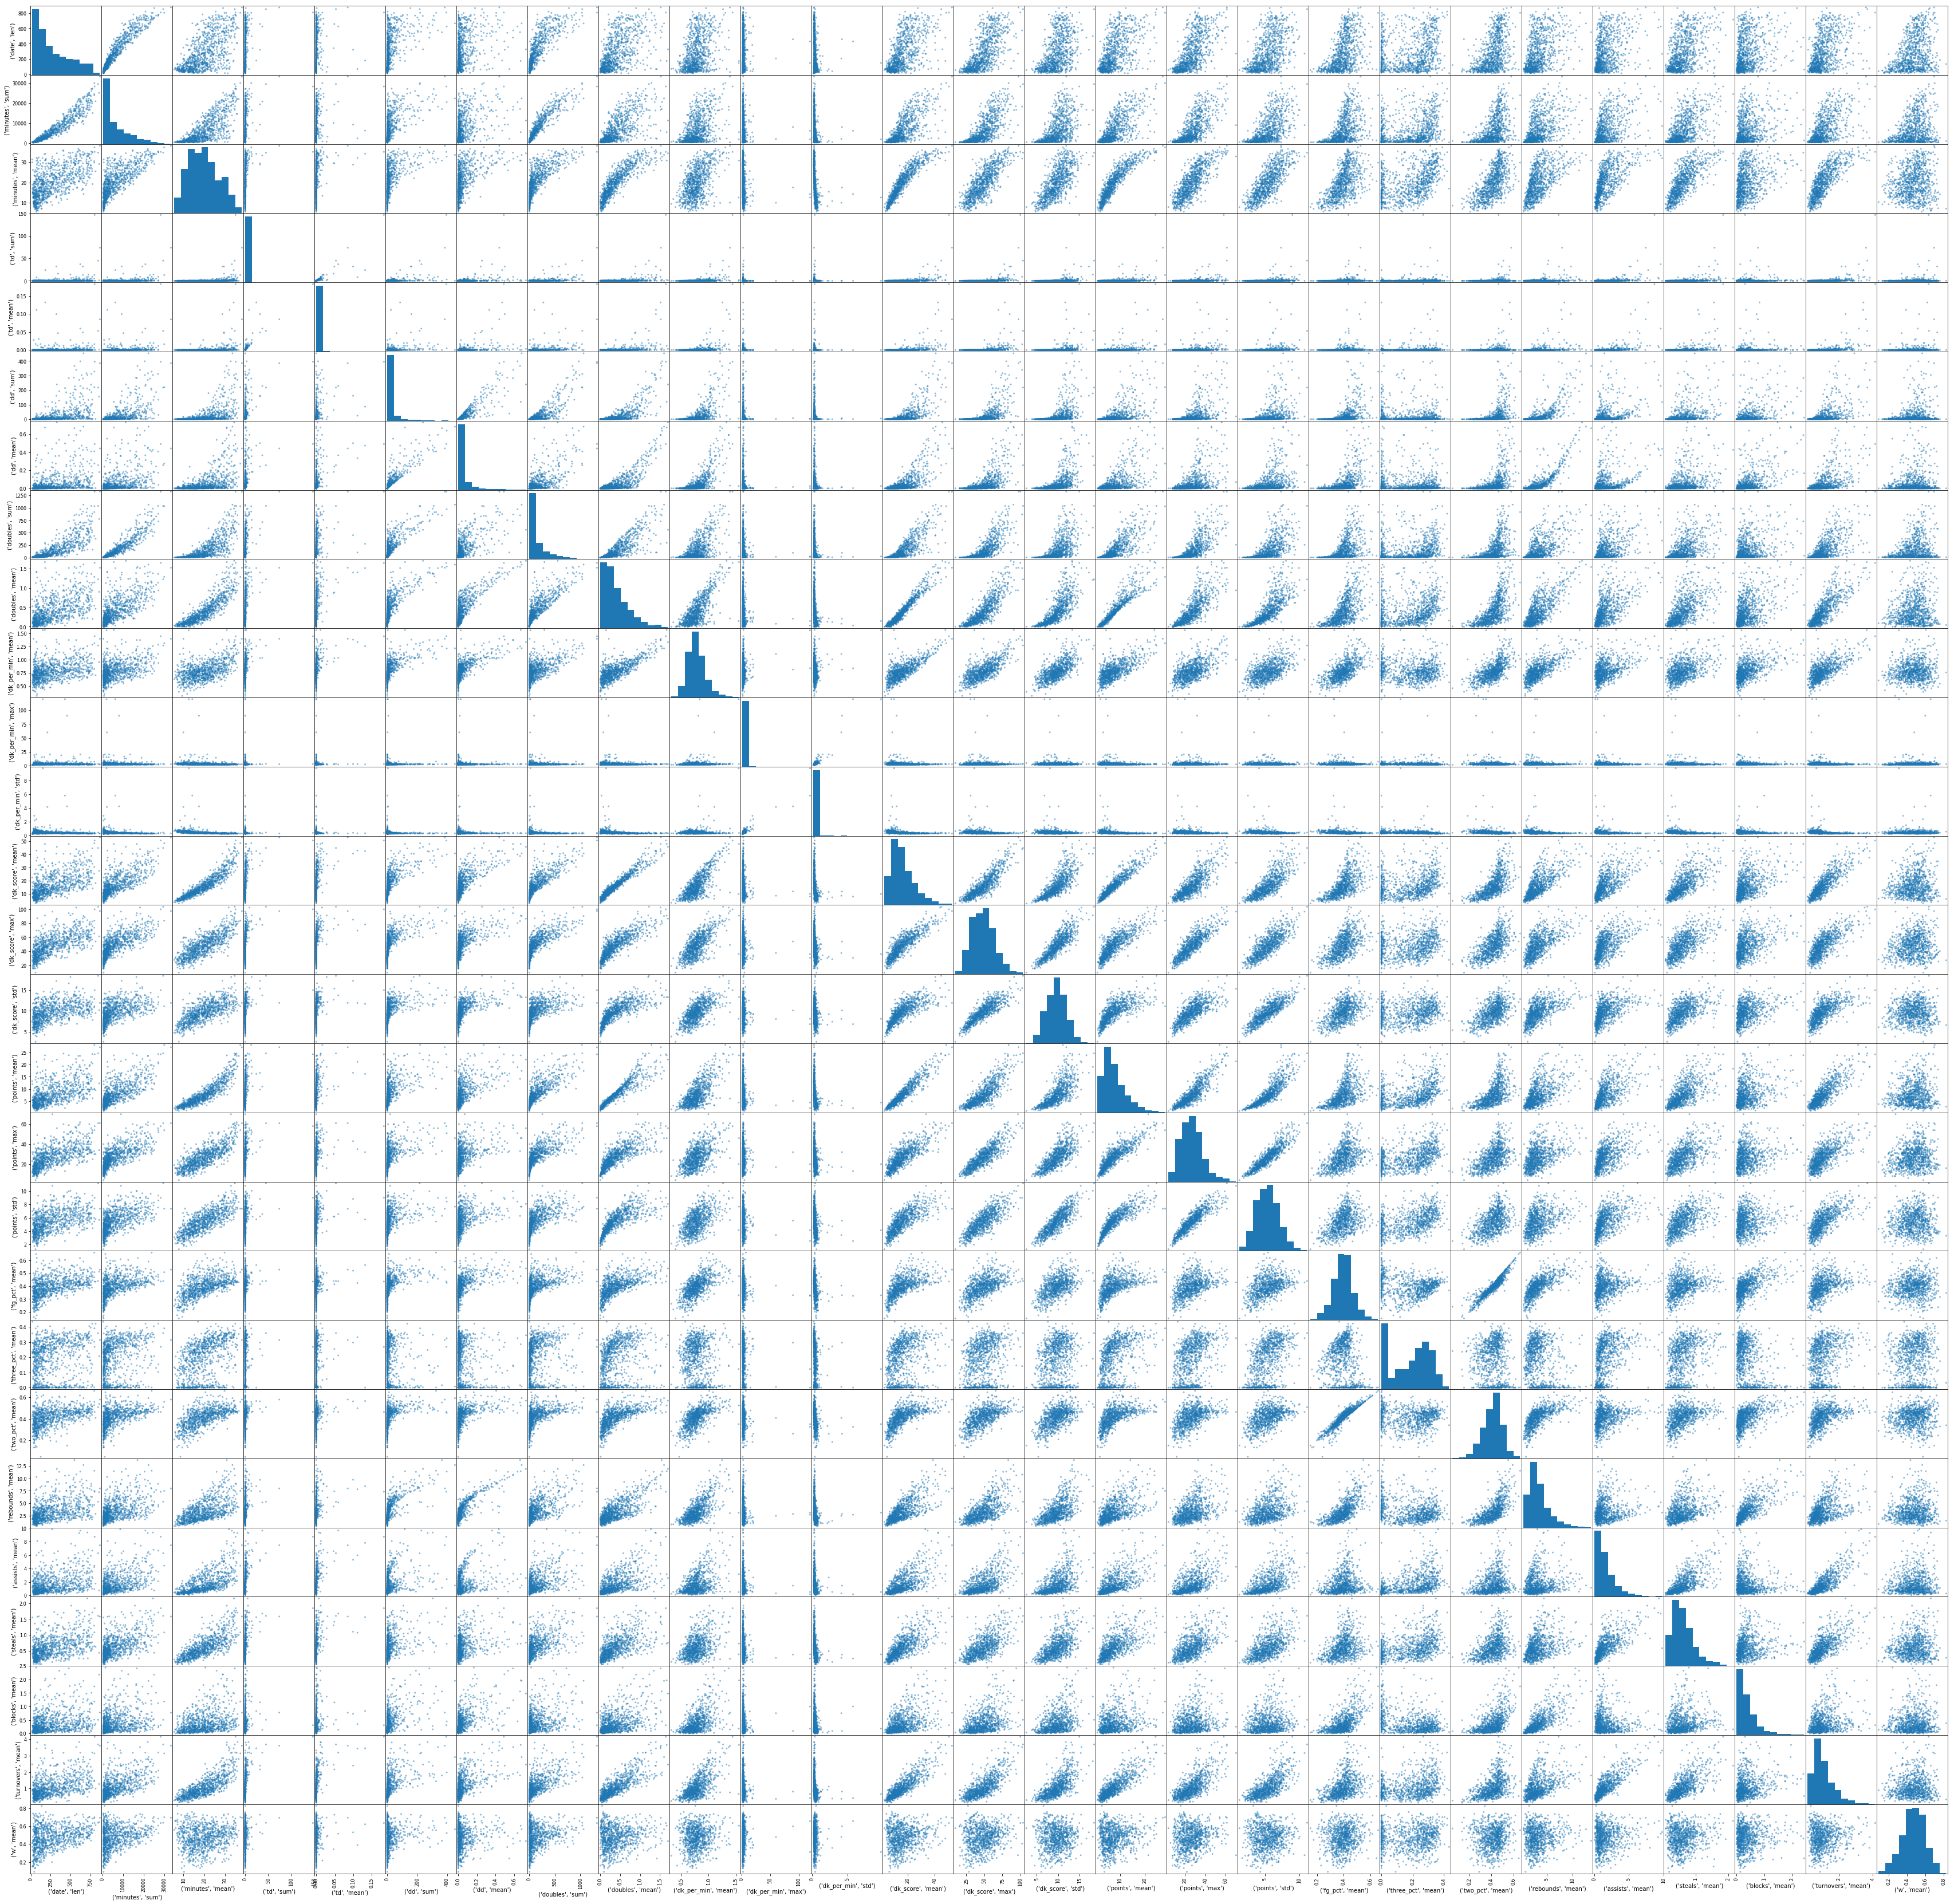

In [427]:
pd.plotting.scatter_matrix(summary[summary[('minutes','sum')]>300],figsize=(60,60))

In [477]:
summary.corr().to_csv('summary_cor.csv')


In [478]:
summary[summary[('minutes','sum')]>300].corr().to_csv('summary_cor_300.csv')
summary[summary[('minutes','sum')]>300].to_csv('summary_300.csv')

In [430]:
from matplotlib import pyplot as plt

In [464]:
#data['minutes'].value_counts().sum()/len(data['minutes'])
data['minutes'].value_counts().sum()/len(data['minutes'])

1.0

In [473]:
#non_zero =data[data['minutes']>0].copy(deep=True)
len(non_zero)

260383

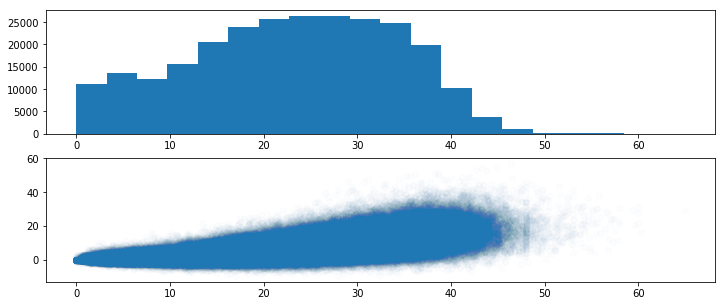

In [483]:
fig,ax = plt.subplots(2,1,figsize = (12,5))
ax[0].hist(data['minutes'],bins=20)
ax[1].scatter(data['minutes'],data['game_score'], alpha = 0.01)
plt.show()


In [484]:
sal2017 = pd.read_csv("data/salary_data2017.csv")
sal2018 = pd.read_csv("data/salary_data2018.csv")
sal2019 = pd.read_csv("data/salary_data2019.csv")

In [486]:
print(sal2017.shape)
print(sal2018.shape)
print(sal2019.shape)

(17931, 4)
(37329, 4)
(19788, 4)


In [488]:
salary_data = sal2017.append(sal2018).append(sal2019)
salary_data.shape

(75048, 4)

In [489]:
print(salary_data.columns)
print(data.columns)

Index(['player', 'pos', 'salary', 'date'], dtype='object')
Index(['assists', 'attempted_field_goals', 'attempted_free_throws',
       'attempted_three_point_field_goals', 'blocks', 'date',
       'defensive_rebounds', 'game_score', 'location', 'made_field_goals',
       'made_free_throws', 'made_three_point_field_goals', 'name',
       'offensive_rebounds', 'opponent', 'outcome', 'personal_fouls',
       'seconds_played', 'slug', 'steals', 'team', 'turnovers', 'points',
       'rebounds', 'doubles', 'dd', 'td', 'dk_score', 'minutes', 'fg_pct',
       'three_pct', 'two_pct', 'ft_pct', 'w', 'dk_per_min'],
      dtype='object')


In [535]:
min_date
np.r_[0:len(both_data)]

array([    0,     1,     2, ..., 90618, 90619, 90620])

In [547]:
max_date = salary_data['date'].max()
max_date

'2019-05-20'

In [541]:
fig, ax = plt.subplots(figsize = (12,5))
ax.hist(both_data['date'], alpha = 0.5)
ax.hist(salary_data['date'], alpha = 0.5)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x138b59048> (for post_execute):


KeyboardInterrupt: 

In [589]:
min_date = salary_data['dt'].min()
both_data = data[data['dt']>=min_date]
#max_date = salary_data['date'].max()
#both_data = both_data[both_data['date']<=max_date]

In [586]:
left = set(salary_data['dt'].unique())
right = set(data['dt'].unique())
len(left.intersection(right))
#[elem for elem in right if elem not in left.intersection(right)]

356

In [593]:
both_data.shape
salary_data.shape

(75048, 5)

In [582]:
data['dt']=pd.to_datetime(data['date'])
salary_data['dt']=pd.to_datetime(salary_data['date'])

In [552]:

left = set(salary_data['player'].unique())
right = set(both_data['name'].unique())

len(left.intersection(right))

0

In [595]:
left = both_data.merge(salary_data,how = 'left',left_on=['name','dt'],right_on=['player','dt'])
right = both_data.merge(salary_data,how = 'right',left_on=['name','dt'],right_on=['player','dt'])


In [601]:
print(left.shape)
print(both_data.shape)
left[left['player'].isna()]['name'].unique()

(55697, 40)
(55697, 36)


array(['Dennis Schröder', 'Nikola Vu?evi?', 'Kelly Oubre', 'Dennis Smith',
       'Goran Dragi?', 'J.J. Barea', 'Manu Ginóbili', 'Nenê Hilário',
       'Taurean Waller-Prince', 'Ersan ?lyasova', "DeAndre' Bembry",
       'Skal Labissière', 'Bojan Bogdanovi?', 'Nikola Joki?',
       'Jusuf Nurki?', 'Timothé Luwawu-Cabarrot', 'Patty Mills',
       'Dario \x8aari?', 'Derrick Jones', 'T.J. Leaf', 'Juan Hernangómez',
       'D?vis Bert?ns', 'Mirza Teletovi?', 'Ish Smith',
       'Jonas Valan?i?nas', 'Kristaps Porzi??is', 'Lou Williams',
       'Larry Nance', 'Milo\x9a Teodosi?', 'Willy Hernangómez',
       'Cristiano Felício', 'Jakob Pöltl', 'Tim Hardaway', 'Álex Abrines',
       'CJ McCollum', 'Joe Young', 'José Calderón', 'Nicolás Brussino',
       'DeMar DeRozan', 'Serge Ibaka', 'Ben Simmons', 'Kyle Lowry',
       'Lucas Nogueira', 'Jerryd Bayless', 'Delon Wright',
       'Jahlil Okafor', 'Ante \x8ei\x9ei?', 'Amir Johnson',
       'Pascal Siakam', 'Justin Anderson', 'J.J. Redick', 'OG An

In [605]:
pd.Drame(right[right['name'].isna()]['player'].unique()).to_csv('')

array(['Cameron Oliver', 'Bobby Brown', 'Andre Iguodala', 'Marcus Morris',
       'Jose Calderon', 'Channing Frye', 'Tarik Black', 'Nene Hilario',
       'Isaiah Thomas', 'Zhou Qi', 'JaVale McGee', 'Devin Williams',
       'Guerschon Yabusele', 'L.J. Peak', 'Abdel Nader', 'Daniel Theis',
       'Jabari Bird', 'Tim Quarterman', 'Kadeem Allen', 'Cedi Osman',
       'Ante Zizic', 'Antonius Cleveland', 'Chris Boucher',
       'George de Paula', 'Andrew White III', 'Troy Williams',
       'Alex Hamilton', 'Chinanu Onuaku', 'Georges Niang',
       'Chris Johnson', 'Kendrick Perkins', 'Walter Tavares',
       'Richard Jefferson', 'Jonathan Holmes', 'Isaiah Taylor',
       'Damian Jones', 'Kay Felder', 'John Holland', 'Michael Gbinije',
       'Demetrius Jackson', 'Darrell Arthur', 'Davon Reed',
       'Jared Dudley', 'Derrick Jones Jr.', 'Eric Griffin',
       'Nate Wolters', "Royce O'Neale", 'Dante Exum', 'Brandon Knight',
       'Tony Bradley', 'Edmond Sumner', 'Monte Morris', 'Jordan Micke

In [610]:
np.r_[0:len(series):int(len(series))/n]
data.

array([0. , 1.2, 2.4, 3.6, 4.8])

In [652]:
def get_n_groups(data, f1, f2,n=10, ascending = True):
    lines= np.r_[0:len(data):int(len(data)/n)]
    out = np.zeros((n,2))
    temp_data = data.sort_values(by = f1,ascending=ascending)
    for ind,i in enumerate(lines[1:]):
        quantile = temp_data[f1].iloc[i]
        out[ind,0]=quantile
        out[ind,1]=temp_data[(temp_data[f1]>=temp_data[f1].iloc[lines[ind-1]])&
                             (temp_data[f1]<=quantile)][f2].mean()
    return pd.DataFrame(out,columns=[f1,f2])

In [654]:
asdf = get_n_groups(data,'minutes','dd',20)
fasdf

minutes        dd
0    3.716667       NaN
1    6.833333  0.000000
2   10.283333  0.000000
3   12.933333  0.000038
4   15.083333  0.000306
5   16.983333  0.001495
6   18.733333  0.003527
7   20.433333  0.006056
8   22.083333  0.012372
9   23.716667  0.021600
10  25.300000  0.032945
11  26.900000  0.049403
12  28.500000  0.067332
13  30.116667  0.090207
14  31.766667  0.117530
15  33.450000  0.146901
16  35.166667  0.175372
17  37.000000  0.206795
18  39.466667  0.245259
19  57.183333  0.297021

Text(0, 0.5, 'minutes')

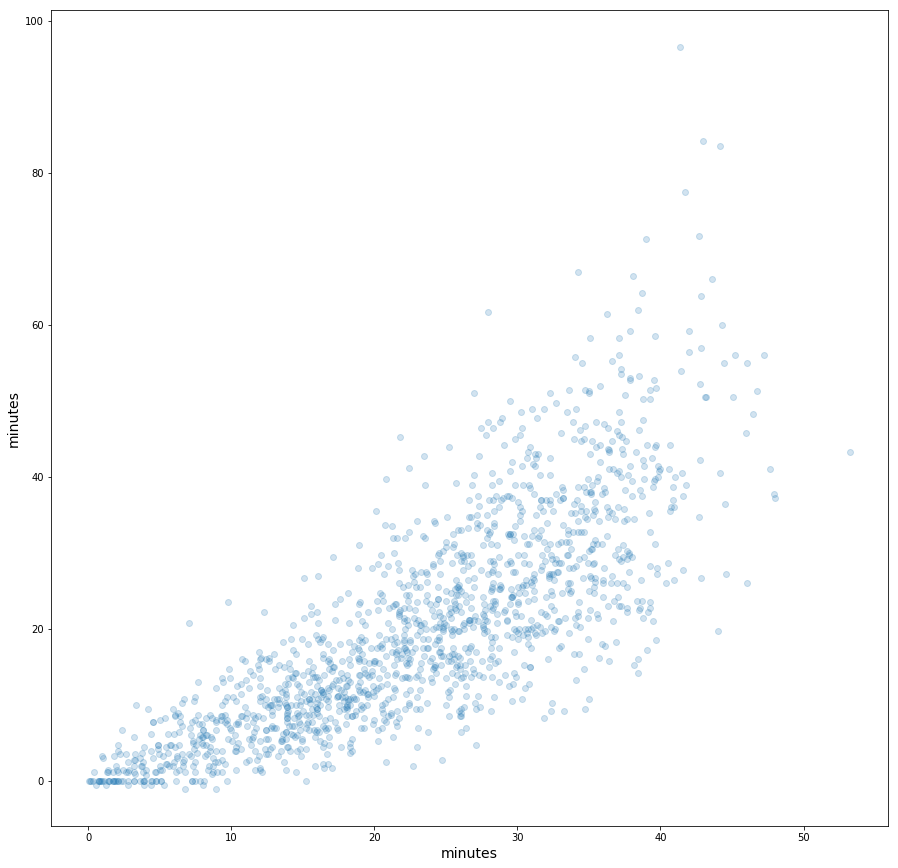

In [664]:
f1 = 'minutes'
f2 = 'dk_score'
n = 1500
sub = data.iloc[::int(len(data)/n),:]
fig, ax = plt.subplots(figsize = (15,15))
ax.scatter(sub[f1],sub[f2], alpha = 0.2)
ax.set_xlabel(f1, size = 14)
ax.set_ylabel(f2, size = 14)

In [722]:
def get_n_scatter(data, f1, f2,n=1500,buckets = 10,ax = plt, ascending = True,alpha=0.7, s = 6):
    sub = data.iloc[::int(len(data)/n),:]
    lines= np.r_[0:len(sub):int(len(sub)/buckets)]
    out = np.zeros((buckets,2))
    temp_data = sub.sort_values(by = f1,ascending=ascending)
    #print(temp_data.shape)
    for ind,i in enumerate(lines[1:]):
        quantile = temp_data[f1].iloc[i]
        out[ind,0]=quantile
        sub = temp_data[(temp_data[f1]>=temp_data[f1].iloc[lines[ind]])&
                             (temp_data[f1]<=quantile)]
        #print(sub.shape)
        out[ind,1]=sub[f2].mean()
        ax.scatter(sub[f1],sub[f2],alpha = alpha, s = s )
    ax.set_xlabel(f1, size = 16)
    ax.set_ylabel(f2, size = 16)
    return pd.DataFrame(out,columns=[f1,f2])

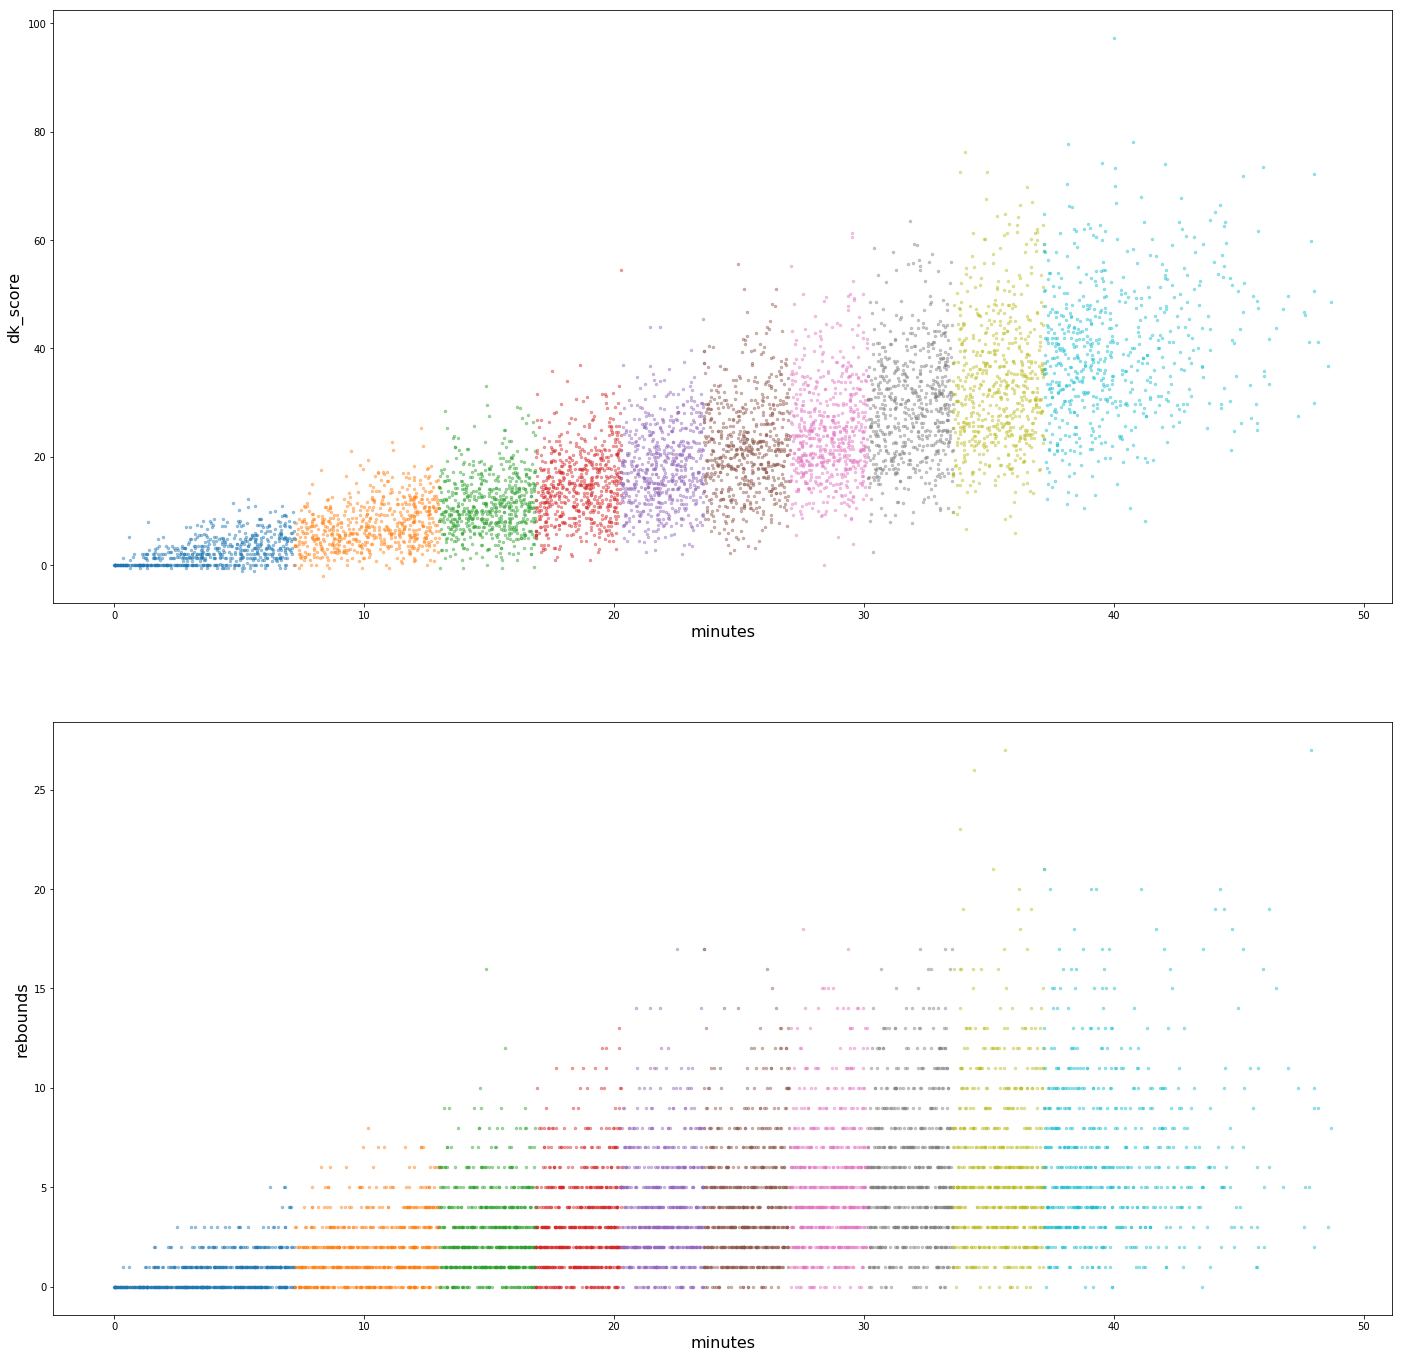

In [723]:
alpha = 0.4
n = 6000
f2 = 'dk_score'
combos = [('minutes','dk_score'),('minutes','rebounds')
         ]
fig, ax = plt.subplots(len(combos),1,figsize=(24,24))
buckets = [get_n_scatter(data,elem[0],elem[1],ax = ax[ind],alpha= alpha,n = n) for ind,elem in enumerate(combos)]
#buckets = get_n_scatter(data,f1,f2,ax = ax[0], alpha , n )
plt.show()

In [714]:
fig, ax = plt.subplots()

[('minutes', 'dk_score')]

In [711]:
sdf = ('asdf','jkl;')
sdf[0]

'asdf'

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))

In [508]:
both = both_data.merge(salary_data,how = 'inner',left_on=['name','date'],right_on=['player','date'])
both.shape

(0, 38)

In [673]:
print(both_data['name'].value_counts()[0:5])

Pascal Siakam    195
Klay Thompson    193
P.J. Tucker      192
Kevon Looney     188
Jayson Tatum     187
Name: name, dtype: int64


In [513]:
print(salary_data['player'].value_counts()[0:5])

Rodney Hood       181
Kevon Looney      177
Klay Thompson     177
Damian Jones      177
Draymond Green    177
Name: player, dtype: int64


In [514]:
salary_data.to_csv('data/salary_data_dk.csv',index = False)

In [518]:
salary_data['date'].value_counts().sort_values()

2017-11-21     34
2019-05-16     64
2019-05-19     64
2019-05-17     64
2019-05-20     64
2019-05-14     64
2019-05-18     64
2019-05-15     64
2019-04-29     65
2019-05-03     65
2018-05-08     65
2019-05-07     65
2018-05-01     65
2019-05-05     65
2019-05-12     65
2019-05-01     65
2019-05-09     65
2018-02-15     65
2019-04-15     66
2018-04-28     66
2018-12-20     66
2018-01-04     66
2018-05-04     66
2017-11-16     66
2018-05-06     66
2018-04-16     66
2019-04-30     67
2019-04-22     67
2018-05-05     67
2019-05-08     67
             ... 
2017-12-15    361
2018-11-30    362
2017-11-20    362
2018-12-12    362
2017-11-17    364
2018-10-17    364
2018-12-23    364
2018-12-10    365
2017-11-15    365
2019-04-09    366
2019-04-10    366
2017-12-04    367
2019-02-02    367
2017-11-11    371
2018-02-14    387
2018-12-19    394
2019-04-03    397
2018-04-01    397
2017-12-20    397
2018-01-03    397
2017-12-23    398
2017-11-03    399
2018-04-11    400
2017-11-01    400
2018-11-21

In [524]:
#sal2017[sal2017['date']<'2017-10-20']['player']='joe'
sal2017.head()

player    pos  salary        date
0    Cameron Oliver     SF    3000  2017-10-17
1  Tristan Thompson      C    3900  2017-10-17
2      Jayson Tatum  SF/PF    3900  2017-10-17
3      Terry Rozier  PG/SG    3800  2017-10-17
4       Bobby Brown     PG    3800  2017-10-17

In [516]:
both_data['date'].value_counts()

4/17/13    308
4/12/17    300
4/16/14    299
4/13/11    298
4/18/12    297
4/15/15    288
3/6/13     288
4/7/19     286
4/14/10    281
4/5/19     281
3/27/13    281
4/13/16    280
4/8/15     279
3/27/15    278
3/7/12     277
4/12/13    276
4/2/14     276
4/1/18     274
4/4/14     274
3/30/11    272
3/4/15     269
4/11/14    268
4/3/18     268
4/1/11     266
4/5/11     265
3/25/15    265
4/7/10     264
4/26/12    263
3/25/11    263
3/28/14    262
          ... 
6/5/14      18
6/4/15      18
5/21/18     18
5/21/11     18
6/9/15      18
5/19/10     18
5/20/15     18
6/7/15      18
6/17/12     18
6/16/15     18
5/31/11     18
5/23/11     18
6/20/13     18
6/5/12      18
5/18/10     18
5/23/19     18
5/28/18     18
6/2/11      18
6/14/15     17
6/18/13     17
5/15/19     17
6/14/12     17
5/24/18     17
6/19/12     17
6/12/12     17
5/9/18      17
5/9/17      16
5/25/19     16
5/22/18     16
5/27/18     15
Name: date, Length: 895, dtype: int64